___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Multivariate Time Series Forecasting with RNN<br><br>Demand Prediction Project (Bike Sharing)<br><h1>

# WELCOME!

Welcome to ***"Demand Prediction Project"***. This is the third capstone project.
As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

In this project, the goal is to predict the number of future bike shares given the historical data of London bike shares. So this case should be handled as a time series problem with ***Bidirectional LSTM***. 

In order to achieve this goal, you will make predictions with LSTM, unlike the machine learning algorithms you have applied before. Long short term memory (LSTM) is an artificial repetitive neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback links. It can process not only single data points but also entire data series. 

Before diving into the project, please take a look at the Determines and Tasks.

- **NOTE:** This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind LSTM.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.

Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

In the Pre-Processing task after train test split and robust scaling, the challenge for you will be to divide the data into time steps and transform it into a three dimentional numpy array.

Then in the model building task, build your model appropriate and compare the train and validation losses using a graph. 

When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.

Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.


- ***Note:*** *What you can do in this project is more than what is asked of you.*


# #Tasks

#### 1. Exploratory Data Analysis

- Check Missing Values and Outliers
- Plot Breakdowns of Data

    *i.  Plot bike shares over time*
    
    *ii.  Plot bike shares by months*
    
    *iii. Plot bike shares by hours*
    
    *iv. Plot bike shares by day of week*
    
    *v. Plot the distribution of bike shares on holidays by seasons*
    
- Drop unnecessary columns
    
#### 2. Data Pre-Processing

- Train - Test Split
- Scaling
- Define a Function for Creating Time Steps

#### 3. Model Building with LSTM

- Create, Compile and Fit Bidirectional LSTM Model
- Plot Train and Validation Losses

#### 4. Evaluate on Test Data

- Inverse Transform
- Plot Prediction

#### 5. Retrain and Forecasting

## Improt Libraries and Indest Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_org = pd.read_csv('/content/drive/MyDrive/data/store_sharing.csv',index_col='timestamp', parse_dates = True)

In [6]:
df = df_org.copy()
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000


---
---

## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

In [7]:
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day
df["hour"] = df.index.hour
df["dayname"] = df.index.weekday

In [8]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayname
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000,2015,1,4,0,6
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000,2015,1,4,1,6
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000,2015,1,4,2,6
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000,2015,1,4,3,6
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000,2015,1,4,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.000,1.000,81.000,19.000,3.000,0.000,0.000,3.000,2017,1,3,19,1
2017-01-03 20:00:00,541,5.000,1.000,81.000,21.000,4.000,0.000,0.000,3.000,2017,1,3,20,1
2017-01-03 21:00:00,337,5.500,1.500,78.500,24.000,4.000,0.000,0.000,3.000,2017,1,3,21,1


### Check Missing Values and Outliers

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   year          17414 non-null  int64  
 10  month         17414 non-null  int64  
 11  day           17414 non-null  int64  
 12  hour          17414 non-null  int64  
 13  dayname       17414 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 2.0 MB


In [10]:
df.isnull().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
year            0
month           0
day             0
hour            0
dayname         0
dtype: int64

**No missing values.**

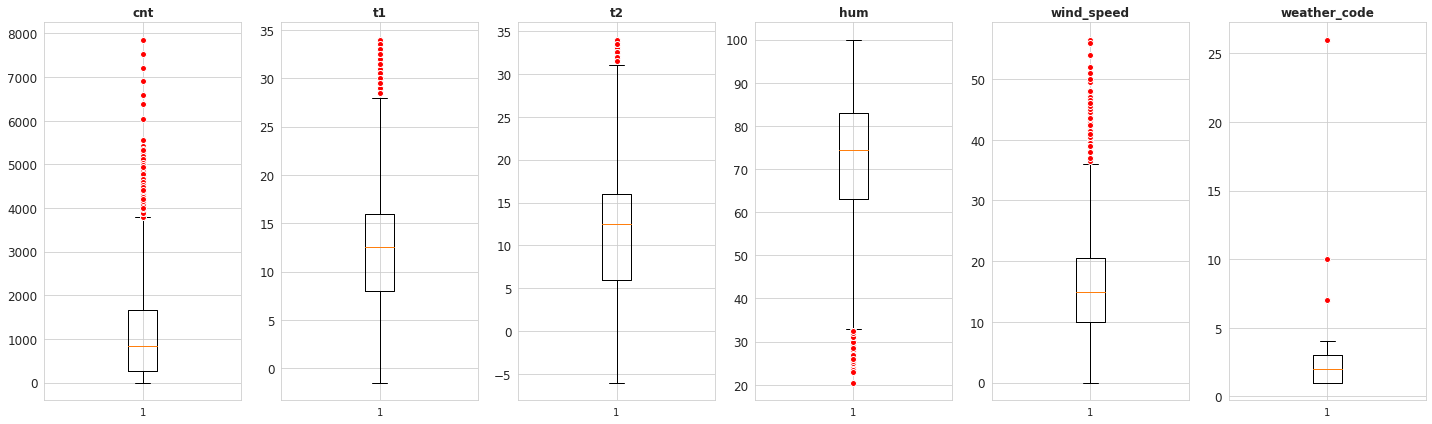

In [11]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
df_box = df.iloc[:,:6]

fig, axs = plt.subplots(1, len(df_box.columns), figsize=(20,6))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_box.iloc[:,i], flierprops=red_circle)
    ax.set_title(df_box.columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

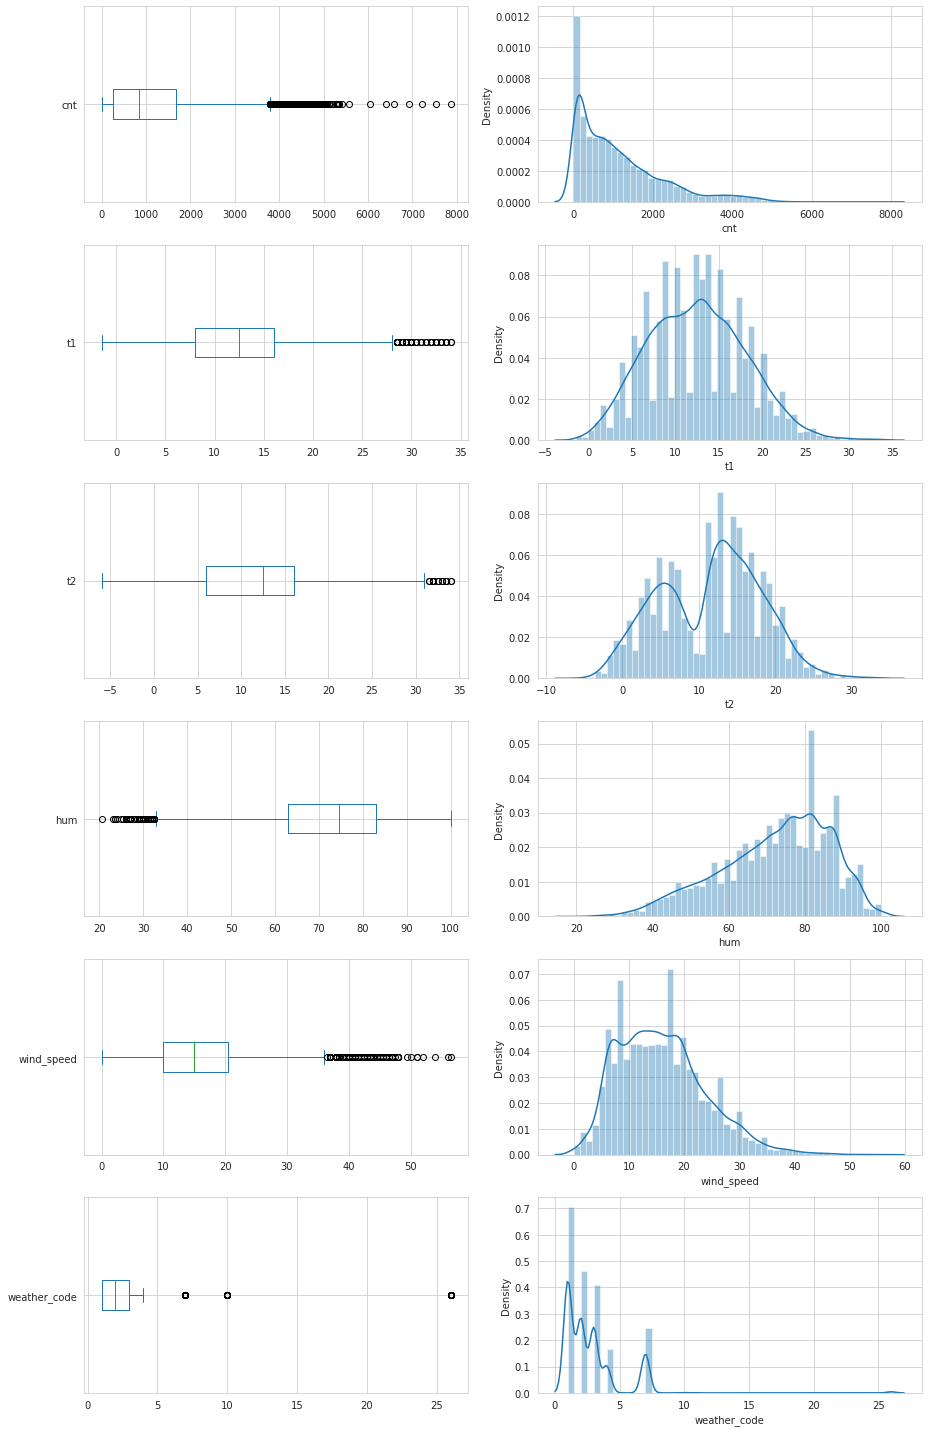

In [12]:
fig, axes = plt.subplots(6,2, figsize=(13,20))
ax = axes.flatten()
for i in range(6):
    df.iloc[:,i].plot.box(vert=False,ax = ax[2*i])
    sns.distplot(df.iloc[:,i], ax=ax[2*i+1])
plt.tight_layout()

In [13]:
df.weather_code.value_counts()

1.000     6150
2.000     4034
3.000     3551
7.000     2141
4.000     1464
26.000      60
10.000      14
Name: weather_code, dtype: int64

### Plot Breakdowns of Data

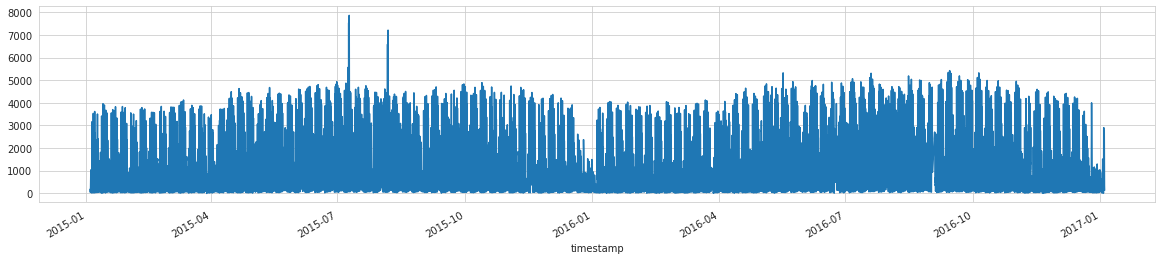

In [14]:
df.cnt.plot(figsize=(20,4));

**There are tube strikes (underground strike) in 6 August 2015 and 9 July 2015. Therefore, count of bike shares is very high in these days.**

In [15]:
df[df.cnt>5500]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,dayname
timestamp,,,,,,,,,,,,,,
2015-07-08 17:00:00,5560,20.000,20.000,53.000,30.000,2.000,0.000,0.000,1.000,2015,7,8,17,2
2015-07-09 08:00:00,7531,14.500,14.500,61.000,19.000,2.000,0.000,0.000,1.000,2015,7,9,8,3
2015-07-09 16:00:00,6033,23.000,22.000,26.000,11.000,1.000,0.000,0.000,1.000,2015,7,9,16,3
2015-07-09 17:00:00,7860,23.000,22.000,27.000,11.000,1.000,0.000,0.000,1.000,2015,7,9,17,3
2015-07-09 18:00:00,6913,22.500,21.500,29.000,13.000,1.000,0.000,0.000,1.000,2015,7,9,18,3
2015-08-06 08:00:00,6585,19.000,19.000,78.000,12.000,7.000,0.000,0.000,1.000,2015,8,6,8,3
2015-08-06 17:00:00,7208,22.500,22.500,55.000,17.500,2.000,0.000,0.000,1.000,2015,8,6,17,3
2015-08-06 18:00:00,6394,21.500,21.500,58.500,20.000,2.000,0.000,0.000,1.000,2015,8,6,18,3


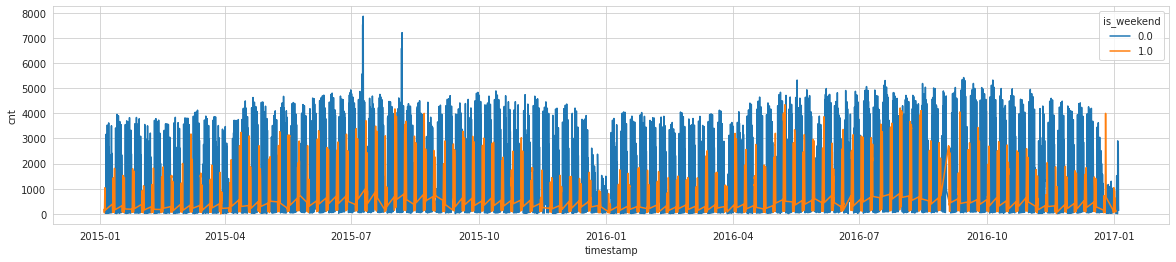

In [16]:
plt.figure(figsize=(20,4))
sns.lineplot(data=df, x=df.index, y=df.cnt, hue=df.is_weekend);

**Bike demands on weekend is less than weekdays.**

In [52]:
from datetime import timedelta
missing_dates = []
for i in range(1,len(df)-1):
  if df.index[i+1] != df.index[i]+timedelta(hours=1):
    missing_dates.append(((df.index[i]+timedelta(hours=1)).strftime('%d-%m-%Y %H:%M'),df.index[i+1].strftime('%d-%m-%Y %H:%M')))
display(missing_dates)

[('07-01-2015 19:00', '07-01-2015 20:00'),
 ('10-02-2015 21:00', '10-02-2015 22:00'),
 ('29-03-2015 02:00', '29-03-2015 03:00'),
 ('31-03-2015 02:00', '31-03-2015 06:00'),
 ('04-04-2015 10:00', '04-04-2015 11:00'),
 ('05-06-2015 03:00', '05-06-2015 06:00'),
 ('13-07-2015 06:00', '13-07-2015 07:00'),
 ('20-07-2015 13:00', '20-07-2015 16:00'),
 ('11-09-2015 22:00', '12-09-2015 06:00'),
 ('19-09-2015 10:00', '19-09-2015 11:00'),
 ('09-10-2015 07:00', '09-10-2015 08:00'),
 ('13-10-2015 17:00', '13-10-2015 23:00'),
 ('25-10-2015 23:00', '26-10-2015 00:00'),
 ('17-11-2015 22:00', '18-11-2015 06:00'),
 ('30-11-2015 20:00', '30-11-2015 21:00'),
 ('12-12-2015 02:00', '12-12-2015 06:00'),
 ('07-02-2016 23:00', '08-02-2016 06:00'),
 ('20-02-2016 08:00', '20-02-2016 09:00'),
 ('26-03-2016 19:00', '27-03-2016 00:00'),
 ('27-03-2016 01:00', '27-03-2016 11:00'),
 ('07-04-2016 08:00', '07-04-2016 09:00'),
 ('24-06-2016 00:00', '24-06-2016 15:00'),
 ('28-07-2016 17:00', '28-07-2016 19:00'),
 ('31-07-20

**The biggest breakdown in the data is between the dates 01.09.2016 23:00 - 03.09.2016 12:00, '24-06-2016 00:00 - 15:00' and '27-03-2016 01:00 - 11:00'**

In [136]:
df1 = df.copy()

In [137]:
for i in range(len(missing_dates)):
  a = pd.to_datetime(missing_dates[i][0])-timedelta(hours = pd.to_datetime(missing_dates[i][0]).hour)
  b = a + timedelta(days=1)-timedelta(hours=1)
  c = pd.to_datetime(missing_dates[i][1])-timedelta(hours = pd.to_datetime(missing_dates[i][1]).hour)
  d = c + timedelta(days=1)-timedelta(hours=1)
  if pd.to_datetime(missing_dates[i][0]).day == pd.to_datetime(missing_dates[i][1]).day:
    df1.drop(df1.loc[a:b].index, inplace=True)
  elif pd.to_datetime(missing_dates[i][1]).hour == 0:
    df1.drop(df1.loc[a:b].index, inplace=True)
  else:
    df1.drop(df1.loc[a:b].index, inplace=True)
    df1.drop(df1.loc[c:d].index, inplace=True)

**Breakdown days was dropped in df1. df1 is a copy of df before train**

***i. Plot bike shares over time***

In [82]:
import random

In [83]:
def plot_random(date_mode):

  if date_mode == "day":
    a = random.choice(df[df.hour==0].index)
    b = a +timedelta(days=1)
    df[(df.index < b) & (df.index > a)].cnt.plot(figsize=(20,4))
    if df[(df.index < b) & (df.index > a)].is_weekend.value_counts().index[0] == 0:
      plt.title(f"The bike shares in the dates {a}----{b} **** (weekday)")
    else:
      plt.title(f"The bike shares in the dates {a}----{b} **** (weekend)")
  if date_mode == "week":
    a = random.choice(df[(df.dayname==1) & (df.hour==0)].index)
    b = a + timedelta(weeks=1)
    df[(df.index < b) & (df.index > a)].cnt.plot(figsize=(20,4))
    plt.title(f"The bike shares in the dates {a}----{b}")
  if date_mode == "month":
    a = random.choice(df[(df.day==1) & (df.hour==0)].index)
    b = a + timedelta(days=30)
    df[(df.index < b) & (df.index > a)].cnt.plot(figsize=(20,4))
    plt.title(f"The bike shares in the dates {a}----{b}")

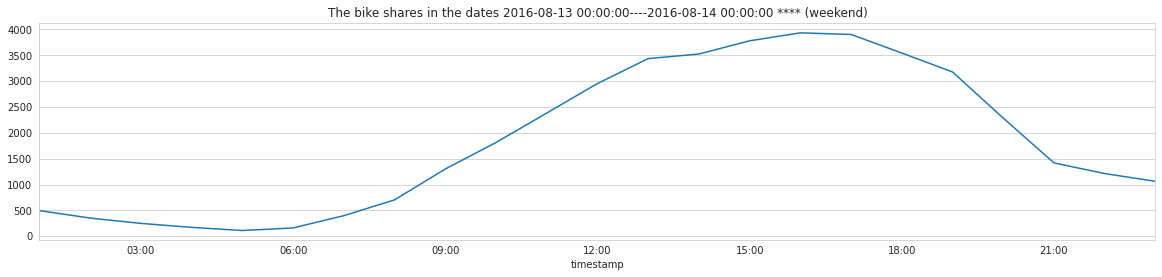

In [84]:
plot_random("day")

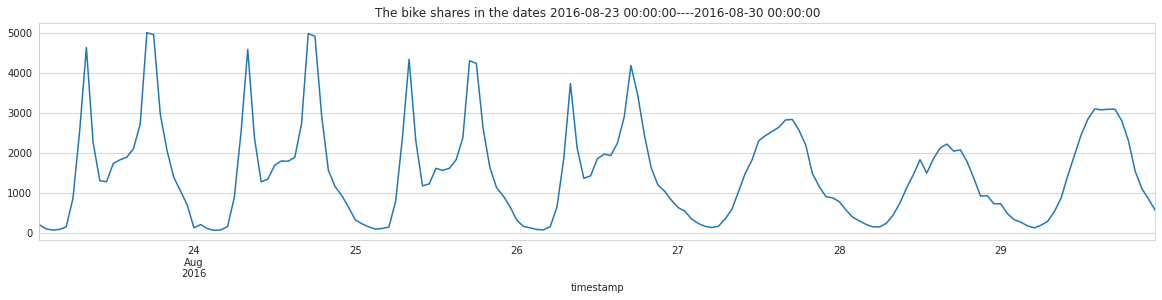

In [85]:
plot_random("week")

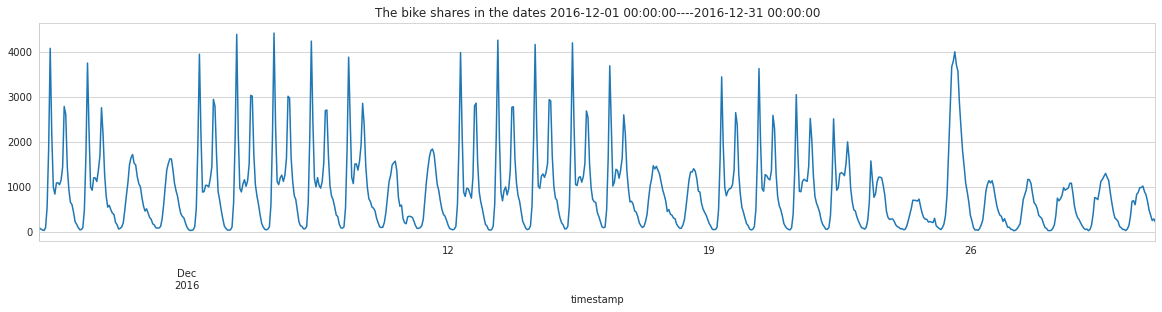

In [86]:
plot_random("month")

***ii. Plot bike shares by months***

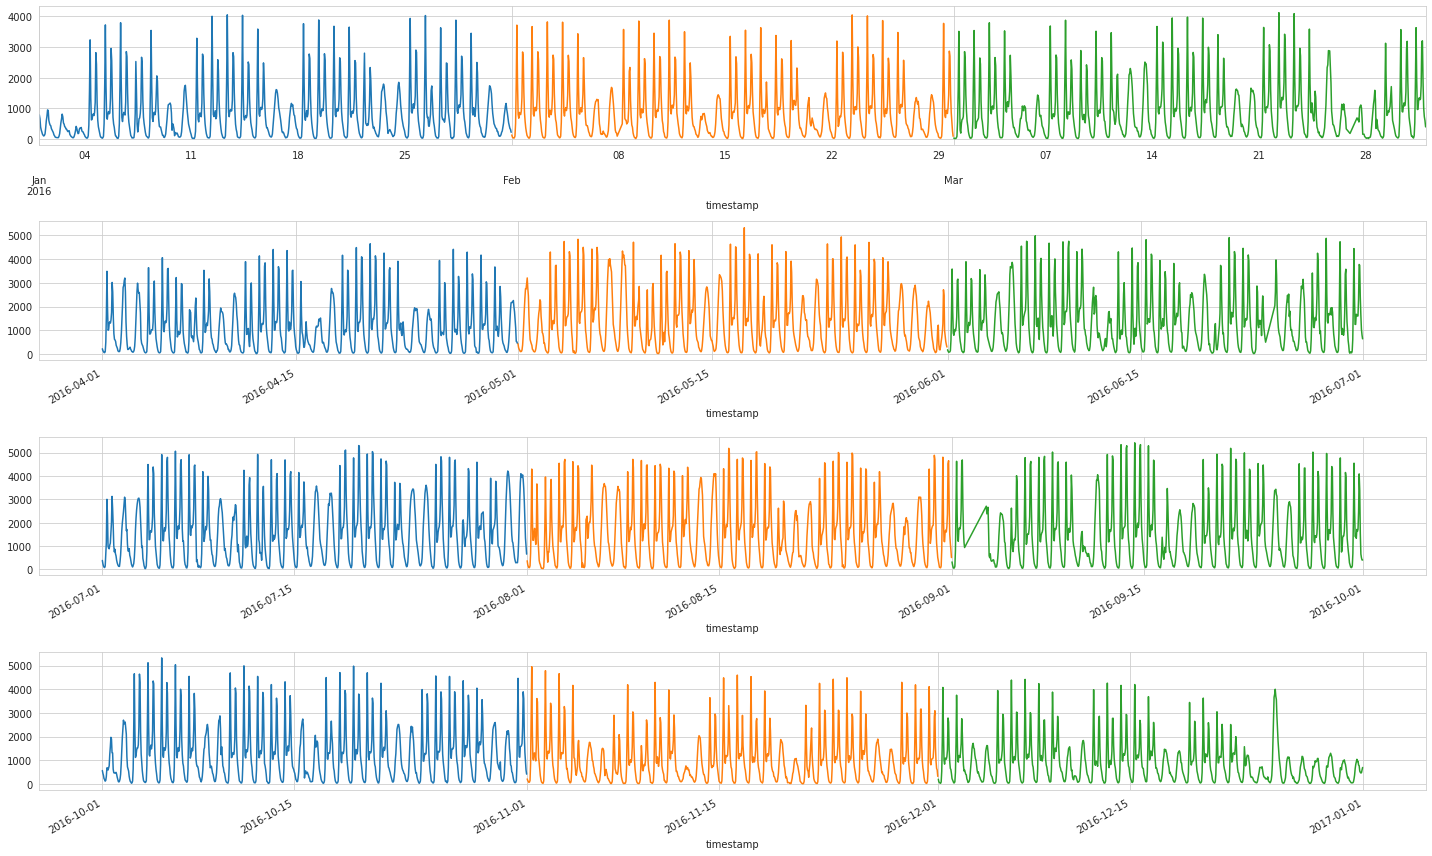

In [87]:
fig, axes = plt.subplots(4,1, figsize=(20,12))
ax = axes.flatten()
df[(df.year==2016) & (df.month==1)].cnt.plot(ax = ax[0])
df[(df.year==2016) & (df.month==2)].cnt.plot(ax = ax[0])
df[(df.year==2016) & (df.month==3)].cnt.plot(ax = ax[0])
df[(df.year==2016) & (df.month==4)].cnt.plot(ax = ax[1])
df[(df.year==2016) & (df.month==5)].cnt.plot(ax = ax[1])
df[(df.year==2016) & (df.month==6)].cnt.plot(ax = ax[1])
df[(df.year==2016) & (df.month==7)].cnt.plot(ax = ax[2])
df[(df.year==2016) & (df.month==8)].cnt.plot(ax = ax[2])
df[(df.year==2016) & (df.month==9)].cnt.plot(ax = ax[2])
df[(df.year==2016) & (df.month==10)].cnt.plot(ax = ax[3])
df[(df.year==2016) & (df.month==11)].cnt.plot(ax = ax[3])
df[(df.year==2016) & (df.month==12)].cnt.plot(ax = ax[3])
plt.tight_layout()

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

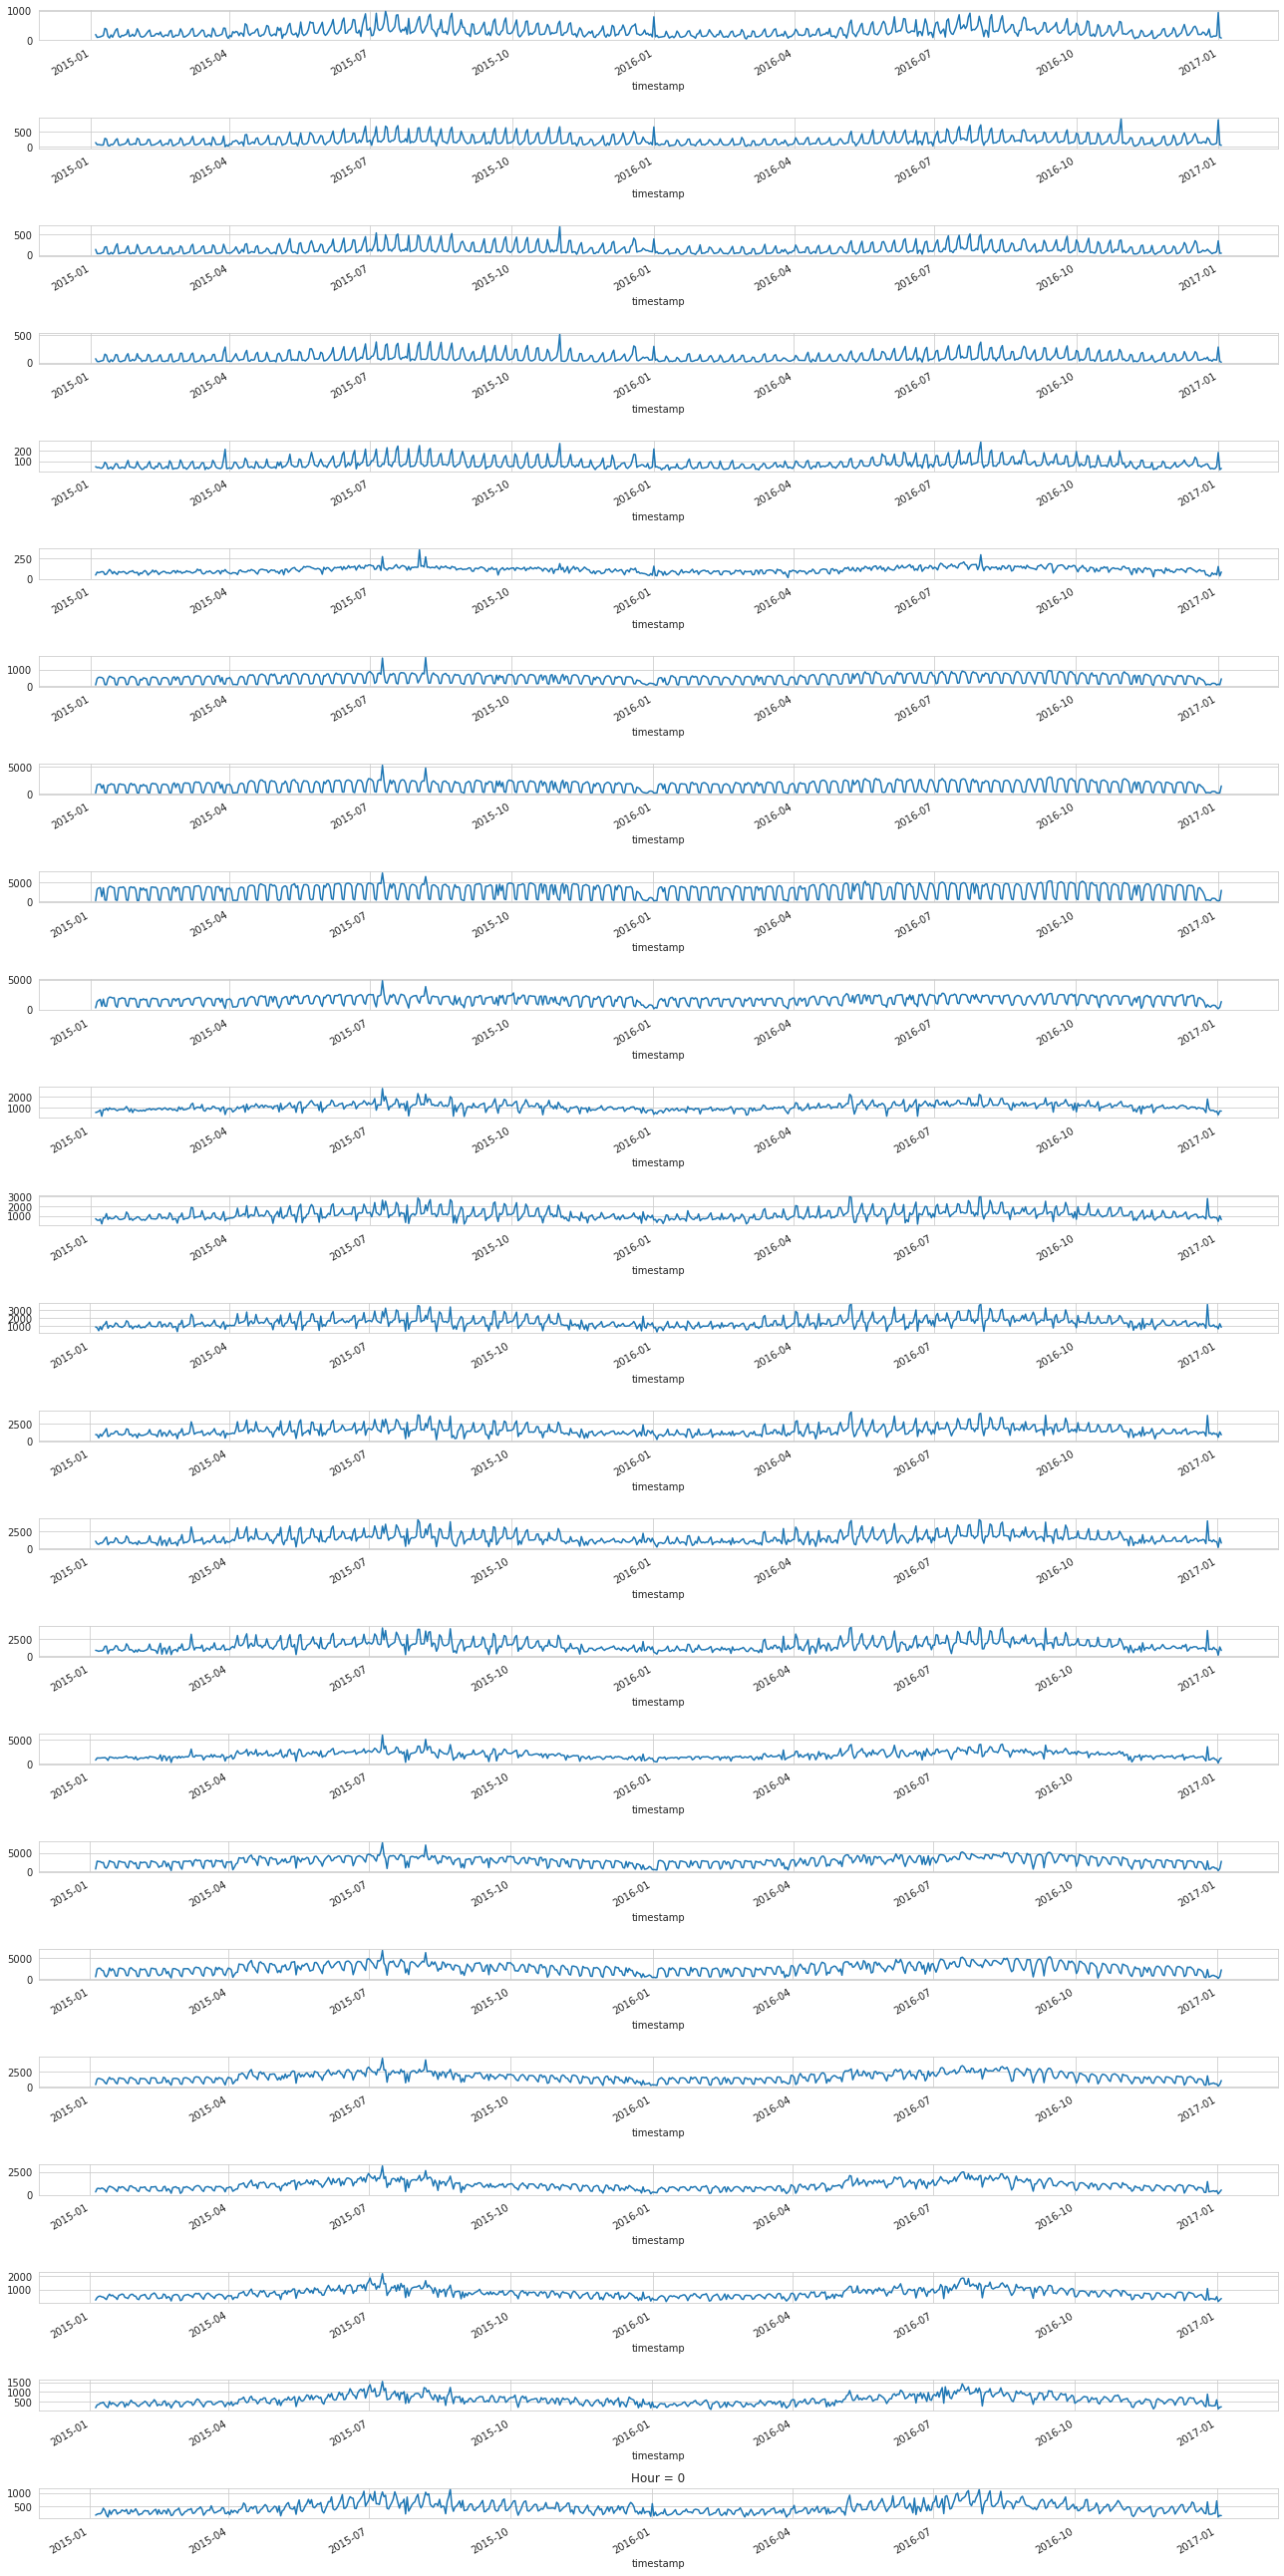

In [88]:
fig, axes = plt.subplots(24,1, figsize=(18,36))
ax = axes.flatten()
for i in range(23,-1,-1):
  df[df.hour==i].cnt.plot(ax = ax[i])
  plt.title(f"Hour = {i}")
  plt.tight_layout()

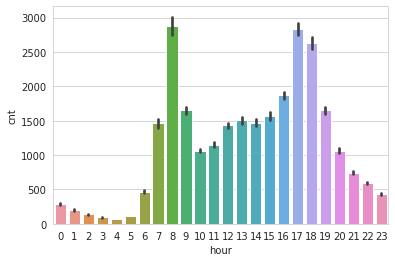

In [89]:
sns.barplot(x=df.hour, y=df.cnt, data=df);

***iv. Plot bike shares by day of week***
- *You may want to see seasonal breakdowns*

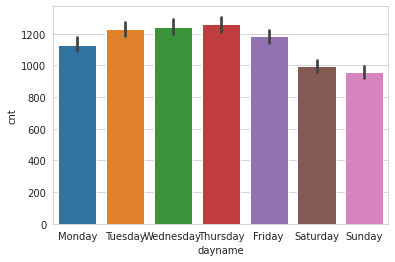

In [90]:
sns.barplot(x=df.dayname, y=df.cnt, data=df)
plt.xticks([0,1,2,3,4,5,6],labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]);

***v. Plot the distribution of bike shares on holidays by seasons***

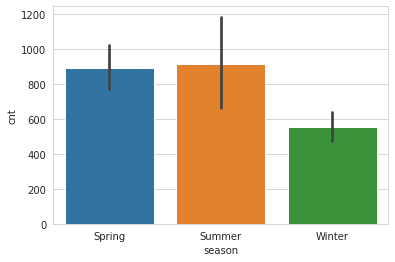

In [91]:
sns.barplot(y = df[df.is_holiday == 1].cnt, x = df[df.is_holiday == 1].season)
plt.xticks([0,1,2],labels = ["Spring", "Summer", "Winter"]);

### Drop unnecessary columns

- Check correlations via heatmap
- Check weather_code
- Think about time-based features and decide dropping which is unnecessary for the model

"weather_code" category description:
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
- 2 = scattered clouds / few clouds 
- 3 = Broken clouds 
- 4 = Cloudy 
- 7 = Rain/ light Rain shower/ Light rain 
- 10 = rain with thunderstorm 
- 26 = snowfall 

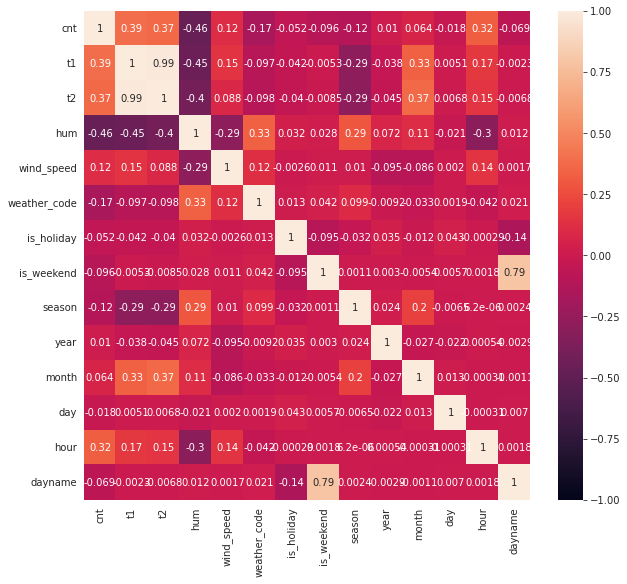

In [92]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(), annot =True, vmin=-1);

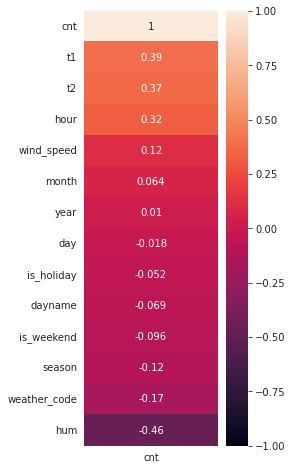

In [93]:
plt.figure(figsize=(3,8))
sns.heatmap(df.corr()[["cnt"]].sort_values(by="cnt", ascending=False), annot =True, vmin=-1);

In [94]:
df.corr()["cnt"]

cnt             1.000
t1              0.389
t2              0.369
hum            -0.463
wind_speed      0.116
weather_code   -0.167
is_holiday     -0.052
is_weekend     -0.096
season         -0.116
year            0.010
month           0.064
day            -0.018
hour            0.324
dayname        -0.069
Name: cnt, dtype: float64

In [95]:
df = df.iloc[:,:-5]

In [97]:
df["t"] = (df["t1"]+df["t2"])/2
df.drop(["t1","t2"], axis=1,inplace=True)

In [99]:
df.columns

Index(['cnt', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend',
       'season', 't'],
      dtype='object')

In [102]:
df.weather_code = df.weather_code.astype("str")

In [107]:
df.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [108]:
df = pd.get_dummies(df, drop_first=True)

In [109]:
df.corr()["cnt"]

cnt                  1.000
hum                 -0.463
wind_speed           0.116
is_holiday          -0.052
is_weekend          -0.096
season              -0.116
t                    0.379
weather_code_10.0   -0.015
weather_code_2.0     0.179
weather_code_26.0   -0.048
weather_code_3.0     0.024
weather_code_4.0    -0.142
weather_code_7.0    -0.148
Name: cnt, dtype: float64

In [110]:
df.drop("weather_code_10.0", axis=1, inplace=True)

## 2. Data Pre-Processing

### Train - Test Split

Appropriately split the data for optimum training.

In [114]:
df.shape

(17414, 12)

In [125]:
17414/24, 17414/24*0.2

(725.5833333333334, 145.11666666666667)

In [126]:
145*24

3480

In [129]:
df.index[-3486]

Timestamp('2016-08-10 00:00:00')

In [130]:
train = df.iloc[:-3486]
test = df.iloc[-3486:]

In [131]:
train.shape, test.shape

((13928, 12), (3486, 12))

In [132]:
train.index[-1]

Timestamp('2016-08-09 23:00:00')

In [138]:
df1.shape

(16739, 12)

In [139]:
16739/24, 16739/24*0.2

(697.4583333333334, 139.49166666666667)

In [140]:
139*24

3336

In [143]:
df.index[-3343]

Timestamp('2016-08-16 00:00:00')

In [144]:
train2 = df.iloc[:-3343]
test2 = df.iloc[-3343:]

In [145]:
train2.shape, test2.shape

((14071, 12), (3343, 12))

### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1'/'t2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

In [133]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [134]:
df.columns

Index(['cnt', 'hum', 'wind_speed', 'is_holiday', 'is_weekend', 'season', 't',
       'weather_code_2.0', 'weather_code_26.0', 'weather_code_3.0',
       'weather_code_4.0', 'weather_code_7.0'],
      dtype='object')

In [135]:
df_columns = df.columns[1:]

df_transformer = RobustScaler()
target_transformer = RobustScaler()

train.loc[:, df_columns] = df_transformer.fit_transform(train[df_columns])
train['cnt'] = target_transformer.fit_transform(train[['cnt']])

test.loc[:, df_columns] = df_transformer.transform(test[df_columns])
test['cnt'] = target_transformer.transform(test[['cnt']])

### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

In [146]:
def create_dataset(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: target value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [147]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13904, 24, 12) (13904,)
(3462, 24, 12) (3462,)


---
---

## 3. Model Building with LSTM



##Recurrent Neural Networks 
RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

#### Bidirectional LSTM :
Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.






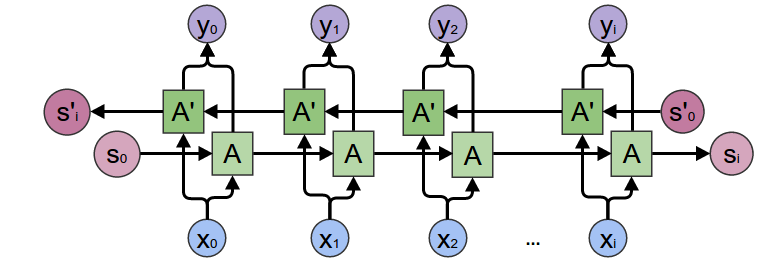

### Create, Compile and Fit Bidirectional LSTM Model

- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*

*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.
Also use defined in Keras as ***accuracy*** as the metrics.*

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [149]:
n_features = X_train.shape[2]

In [150]:
model = Sequential()

model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [151]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [152]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=24, 
          validation_split=0.3,
          shuffle=True,
          callbacks=[early_stop])

Epoch 1/30
406/406 [==============================] - 21s 31ms/step - loss: 0.1493 - val_loss: 0.0719
Epoch 2/30
406/406 [==============================] - 15s 36ms/step - loss: 0.0537 - val_loss: 0.0364
Epoch 3/30
406/406 [==============================] - 14s 36ms/step - loss: 0.0342 - val_loss: 0.0293
Epoch 4/30
406/406 [==============================] - 19s 46ms/step - loss: 0.0272 - val_loss: 0.0252
Epoch 5/30
406/406 [==============================] - 12s 28ms/step - loss: 0.0235 - val_loss: 0.0238
Epoch 6/30
406/406 [==============================] - 12s 30ms/step - loss: 0.0213 - val_loss: 0.0283
Epoch 7/30
406/406 [==============================] - 17s 42ms/step - loss: 0.0192 - val_loss: 0.0237
Epoch 8/30
406/406 [==============================] - 23s 55ms/step - loss: 0.0174 - val_loss: 0.0243
Epoch 9/30
406/406 [==============================] - 19s 47ms/step - loss: 0.0162 - val_loss: 0.0211
Epoch 10/30
406/406 [==============================] - 14s 34ms/step - loss: 0.015

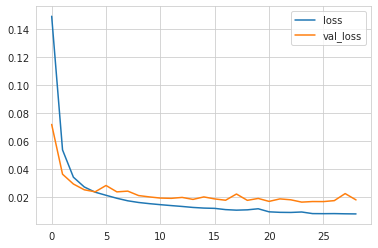

In [153]:
losses = pd.DataFrame(model.history.history)
losses.plot()

---
---

## 4. Evaluate on Test Data

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

Check scores with both scaled results and inversed results

Plot predictions and actula values together

In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [155]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

### First way : after each prediction, reel value will be use for next prediction¶

In [156]:
y_pred = model.predict(X_test)

In [157]:
eval_metrics(y_test, y_pred)

r2_score: 0.9722686416313713 
mae: 0.08018797874456884 
mse: 0.017710482928345355 
rmse: 0.13308073838217668


### Inverse Transformation and Compare

In [158]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = target_transformer.inverse_transform(y_pred)

In [159]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = target_transformer.inverse_transform(y_pred)

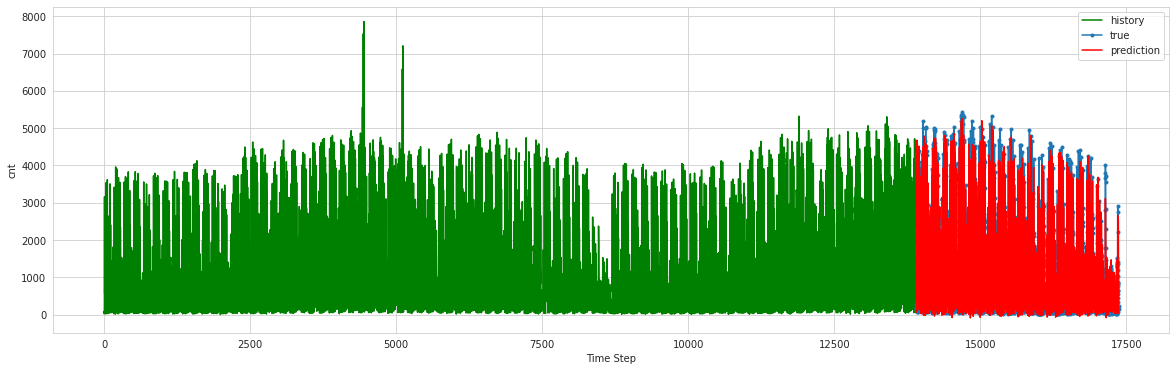

In [161]:
plt.figure(figsize=(20,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('cnt')
plt.xlabel('Time Step')
plt.legend()
plt.show();

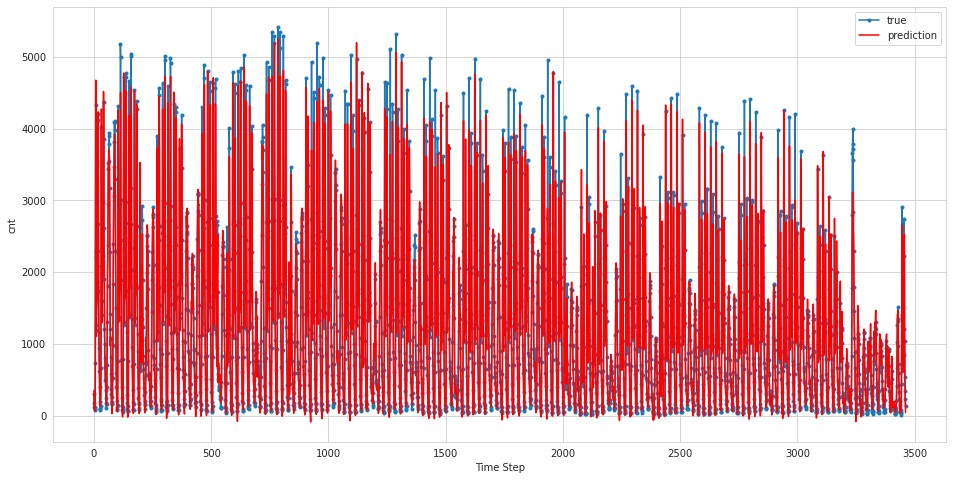

In [162]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('cnt')
plt.xlabel('Time Step')
plt.legend()
plt.show();

### Second way : after each prediction, result will be use for next prediction

In [163]:
df_fake = test.iloc[:time_steps,1:]

In [164]:
reel = np.array(test.iloc[:time_steps,:1])

In [165]:
df_fake.shape

(24, 11)

In [166]:
df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1])).shape

(24, 1, 11)

In [167]:
predictions_scaled = []

first_eval_batch = train.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, n_features))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(time_steps):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0])
    new = features[i][0].tolist()
    new.insert(0,current_pred[0][0])
    new = np.array(new).reshape(1,1,n_features)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis=1)

In [168]:
eval_metrics(reel, predictions_scaled)

r2_score: 0.9697246358250053 
mae: 0.10415292207805799 
mse: 0.027831824588996617 
rmse: 0.166828728308396


### Inverse Transformation and Compare

In [169]:
predictions = target_transformer.inverse_transform(predictions_scaled)
reel = target_transformer.inverse_transform(reel)

In [170]:
compare = pd.DataFrame(data = reel, index = test.index[:time_steps], columns = ["reel"])
compare["prediction"] = predictions
compare

,reel,prediction
timestamp,,
2016-08-10 00:00:00,302.000,251.027
2016-08-10 01:00:00,132.000,88.272
2016-08-10 02:00:00,57.000,28.141
2016-08-10 03:00:00,34.000,18.061
2016-08-10 04:00:00,51.000,48.371
2016-08-10 05:00:00,144.000,264.317
2016-08-10 06:00:00,839.000,1085.926
2016-08-10 07:00:00,2362.000,3074.436
2016-08-10 08:00:00,4443.000,4470.964


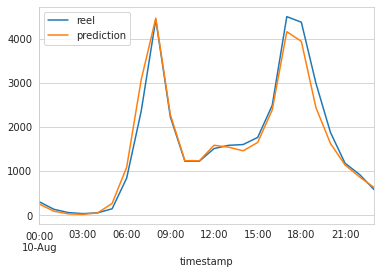

In [171]:
compare.plot()

## 5. Retrain and Forecasting

### Scale full data

In [172]:
val_size = 24
val = df.iloc[-val_size:]
full = df.iloc[:-val_size]
print(len(full), len(val))

17390 24


In [174]:
f_columns = df.columns[1:]

f_transformer = RobustScaler()
target_transformer = RobustScaler()

full.loc[:, f_columns] = f_transformer.fit_transform(full[f_columns])
full['cnt'] = target_transformer.fit_transform(full[['cnt']])

val.loc[:, f_columns] = f_transformer.transform(val[f_columns])
val['cnt'] = target_transformer.transform(val[['cnt']])

### reshape to [samples, time_steps, n_features]

In [176]:
X, y = create_dataset(full, full.cnt, time_steps)

print(X.shape, y.shape)

(17366, 24, 12) (17366,)


### Create Final model with full data 

In [177]:
model = Sequential()

model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [178]:
model.fit(X, y, 
          epochs=15, 
          batch_size=24, 
          shuffle=True
         )

Epoch 1/15
724/724 [==============================] - 31s 33ms/step - loss: 0.1059
Epoch 2/15
724/724 [==============================] - 22s 30ms/step - loss: 0.0330
Epoch 3/15
724/724 [==============================] - 19s 26ms/step - loss: 0.0241
Epoch 4/15
724/724 [==============================] - 19s 26ms/step - loss: 0.0207
Epoch 5/15
724/724 [==============================] - 19s 26ms/step - loss: 0.0184
Epoch 6/15
724/724 [==============================] - 19s 26ms/step - loss: 0.0170
Epoch 7/15
724/724 [==============================] - 19s 27ms/step - loss: 0.0161
Epoch 8/15
724/724 [==============================] - 20s 28ms/step - loss: 0.0153
Epoch 9/15
724/724 [==============================] - 27s 37ms/step - loss: 0.0149
Epoch 10/15
724/724 [==============================] - 23s 32ms/step - loss: 0.0138
Epoch 11/15
724/724 [==============================] - 19s 27ms/step - loss: 0.0133
Epoch 12/15
724/724 [==============================] - 19s 27ms/step - loss: 0.0129
E

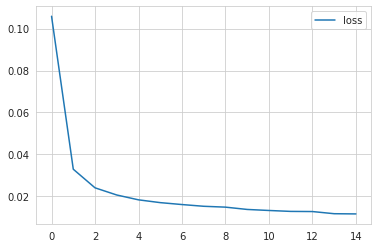

In [179]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### forecasting

In [180]:
df_fake = val.iloc[:,1:]
df_fake

,hum,wind_speed,is_holiday,is_weekend,season,t,weather_code_2.0,weather_code_26.0,weather_code_3.0,weather_code_4.0,weather_code_7.0
timestamp,,,,,,,,,,,
2017-01-03 00:00:00,0.825,-0.455,0.000,0.000,0.667,-1.444,0.000,0.000,0.000,0.000,0.000
2017-01-03 01:00:00,0.675,-0.545,0.000,0.000,0.667,-1.444,0.000,0.000,0.000,0.000,0.000
2017-01-03 02:00:00,0.825,-0.455,0.000,0.000,0.667,-1.528,0.000,0.000,0.000,0.000,0.000
2017-01-03 03:00:00,0.975,-0.273,0.000,0.000,0.667,-1.611,0.000,0.000,0.000,0.000,0.000
2017-01-03 04:00:00,0.975,-0.182,0.000,0.000,0.667,-1.611,0.000,0.000,0.000,0.000,0.000
2017-01-03 05:00:00,0.825,-0.182,0.000,0.000,0.667,-1.556,0.000,0.000,1.000,0.000,0.000
2017-01-03 06:00:00,0.675,0.182,0.000,0.000,0.667,-1.528,0.000,0.000,0.000,0.000,0.000
2017-01-03 07:00:00,0.675,0.273,0.000,0.000,0.667,-1.556,0.000,0.000,0.000,0.000,0.000
2017-01-03 08:00:00,0.675,0.227,0.000,0.000,0.667,-1.528,0.000,0.000,1.000,0.000,0.000


In [181]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([-5.51553672e-01, -5.61440678e-01, -5.65677966e-01, -5.88983051e-01,
       -5.74858757e-01, -5.37429379e-01, -2.89548023e-01,  3.97598870e-01,
        1.45480226e+00,  3.62288136e-01, -1.29237288e-01, -1.46892655e-01,
       -1.34180791e-02,  2.40112994e-02, -5.57909605e-02,  7.06214689e-04,
        2.52118644e-01,  1.34039548e+00,  9.71751412e-01,  1.39830508e-01,
       -2.13983051e-01, -3.58050847e-01, -4.37853107e-01, -4.97881356e-01])

### First way : after each prediction, reel value will be use for next prediction

In [182]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [183]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: 0.957912347892136 
mae: 0.07149157356058655 
mse: 0.013785603256987742 
rmse: 0.11741210864722489


In [184]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[  98.67139 ,   24.4552  ,   60.032898,   82.15253 ,   58.26422 ,
         166.96423 ,  422.86212 , 1305.6924  , 2379.8271  , 1508.2375  ,
         726.1928  ,  610.01245 ,  839.3904  ,  904.03735 ,  886.4157  ,
         778.4717  , 1001.37756 , 2263.0056  , 2406.2837  , 1122.0256  ,
         600.7155  ,  364.95526 ,  214.4234  ,  120.64172 ]],
      dtype=float32)

In [191]:
forecast_index = pd.date_range(start = '2017-01-03 00:00:00', periods = periods, freq = 'H')

In [192]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

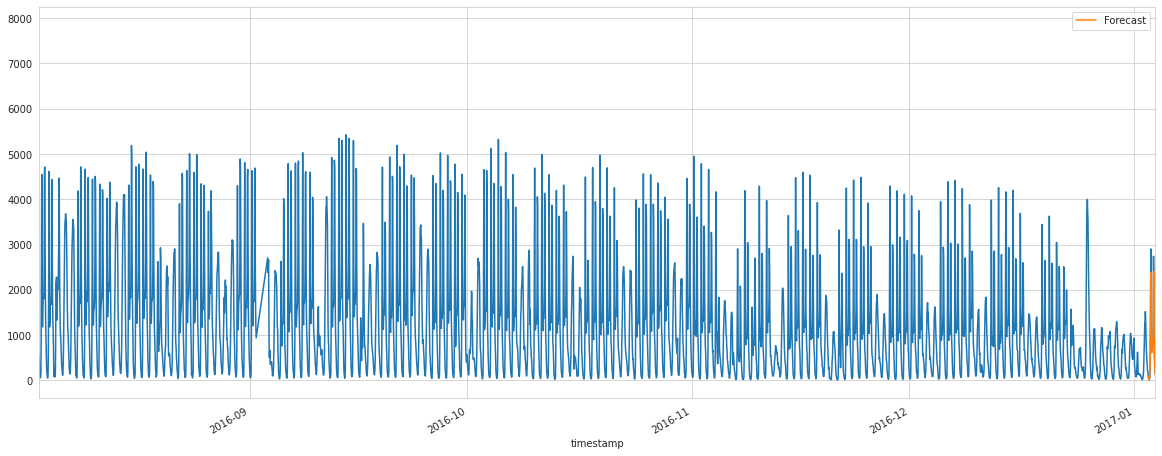

In [198]:
ax = df["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (20, 8))
plt.xlim('2016-08-03 00:00:00', '2017-01-03 23:00:00');

(736332.0, 736332.9583333334)

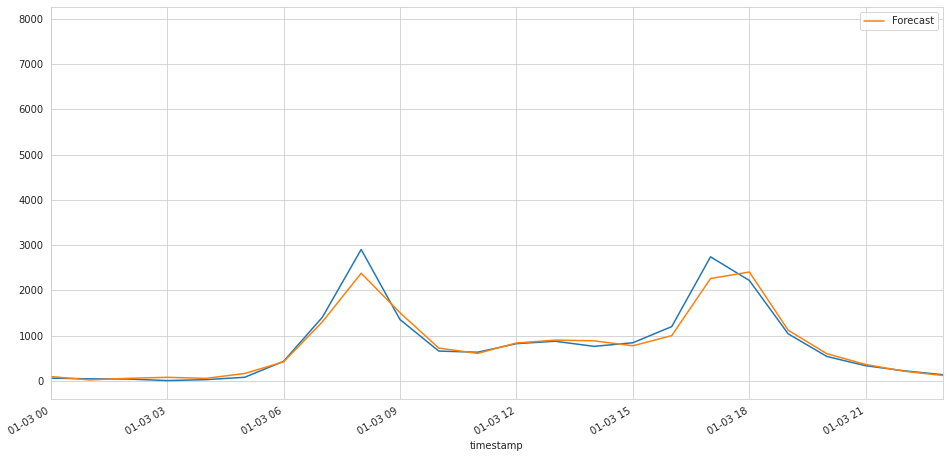

In [194]:
ax = df["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-03 00:00:00', '2017-01-03 23:00:00')

### Second way : after each prediction, result will be used for next prediction

In [199]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,current_pred)
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [200]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: 0.5481018836870295 
mae: 0.2501981853553061 
mse: 0.14801700337441034 
rmse: 0.384729779682325


In [201]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[  98.67139 ,   59.115906,   69.173096,  114.2619  ,  225.18939 ,
         496.60046 , 1142.9214  , 2102.3184  , 1347.9097  ,  730.69965 ,
         649.1457  ,  781.6981  ,  881.09125 ,  861.45264 ,  885.0551  ,
        1167.4617  , 2036.7533  , 1870.2036  , 1060.1787  ,  665.80365 ,
         462.39014 ,  302.87958 ,  175.85657 ,   85.056335]],
      dtype=float32)

In [206]:
forecast_index = pd.date_range(start = '2017-01-03 00:00:00', periods = periods, freq = 'H')

In [207]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

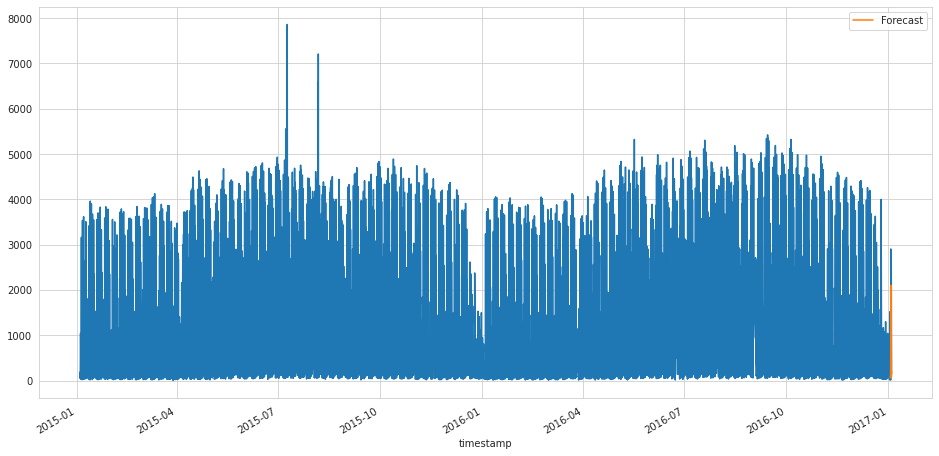

In [208]:
ax = df["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

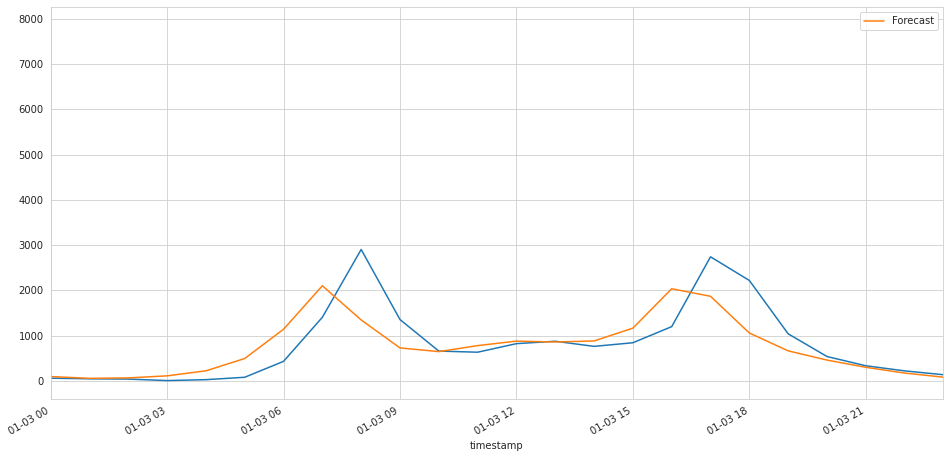

In [211]:
ax = df["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-03 00:00:00', '2017-01-03 23:00:00');

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___